In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import MaxNLocator

In [2]:
df = pd.read_csv('/content/results_Fri_Mar_24_15.23.02_2023.csv')

stanford_df = df[df['name'].str.startswith('/stanford/')].sort_values(by=['density'])
random_df= df[df['name'].str.startswith('/random_graphs/')].sort_values(by=['density'])

stanford_df['name'] = stanford_df['name'].str.replace('/stanford/', '')
random_df['name'] = random_df['name'].str.replace('/random_graphs/', '')

Analysing random graphs

In [3]:
random_df_sparse = random_df[random_df['density'] < 0.5]
random_df_dense = random_df[random_df['density'] >= 0.5]
threads = np.arange(1,21)

dict_r_sparse = [
    random_df_sparse[random_df_sparse['n_vertices'] < 100].sort_values(by=['threads']),
    random_df_sparse[(random_df_sparse['n_vertices'] > 101) & (random_df_sparse['n_vertices'] < 1000)].sort_values(by=['threads']),
    random_df_sparse[random_df_sparse['n_vertices'] > 3001 ].sort_values(by=['threads']),
]

dict_r_dense = [
    random_df_dense[random_df_dense['n_vertices'] < 100].sort_values(by=['threads']),
    random_df_dense[(random_df_dense['n_vertices'] > 101) & (random_df_dense['n_vertices'] < 1000)].sort_values(by=['threads']),
    random_df_dense[random_df_dense['n_vertices'] > 3001 ].sort_values(by=['threads']),
]

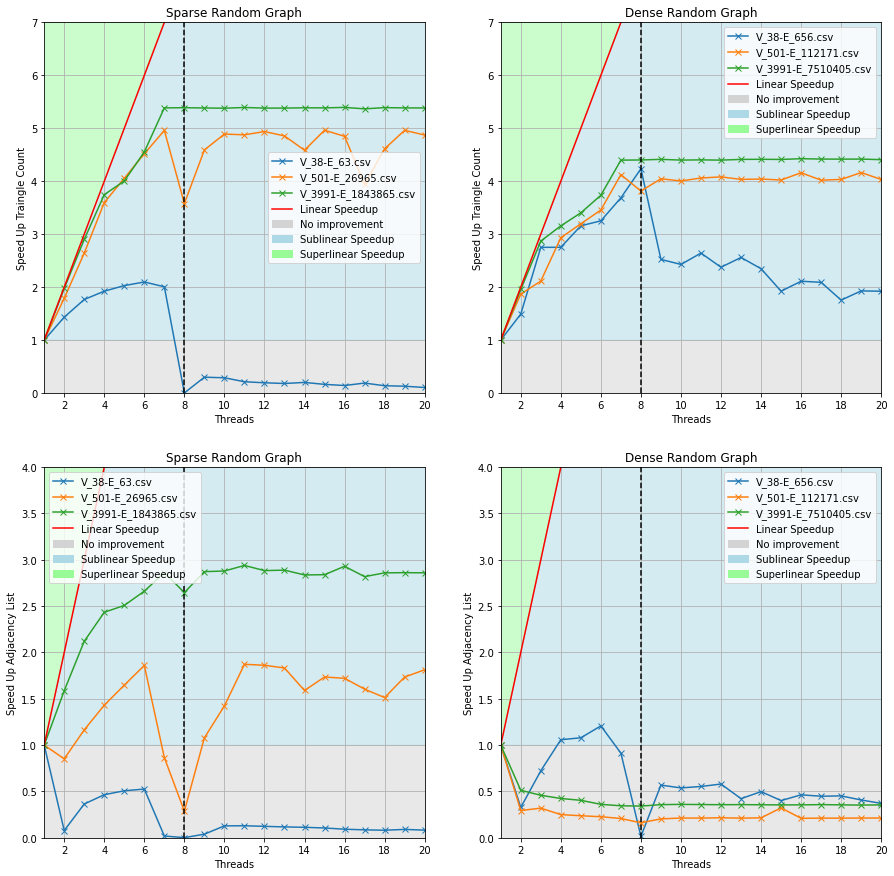

In [4]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

vector = []
y_label = ''
title = ''
y_lim = 0

for id_r, row in enumerate(axs):
    if(id_r == 0): 
        y_label = 'speed_up_traingle_count'
        y_lim = 7
    else:
        y_label = 'speed_up_adjacency_list'
        y_lim = 4

    for id_c, col in enumerate(row):
        seq_plot = []
        
        if(id_c == 0): 
            title = 'Sparse Random Graph'
            vector = dict_r_sparse
        else: 
            title = 'Dense Random Graph'
            vector = dict_r_dense

        for val in vector:
            plot, = col.plot(threads, val[y_label], label=val['name'].unique()[0], marker='x')
            seq_plot.append(plot)
        threads = np.arange(1,21)
        plot, = col.plot(threads, threads, color='red', label='Linear Speedup')
        seq_plot.append(plot)

        col.fill_between(threads, 1, color='lightgrey', interpolate=True, alpha=0.5)
        col.fill_between(threads, 1, threads, color='lightblue', interpolate=True, alpha=0.5)
        col.fill_between(threads, threads, 20, color='palegreen', interpolate=True, alpha=0.5)
        col.axvline(x=8, color='black', ls='--')


        seq_plot.append(mpatches.Patch(color='lightgrey', label='No improvement'))
        seq_plot.append(mpatches.Patch(color='lightblue', label='Sublinear Speedup'))
        seq_plot.append(mpatches.Patch(color='palegreen', label='Superlinear Speedup'))


        col.set_xlabel('Threads')
        col.set_ylabel(y_label.replace('_', ' ').title())
        col.set_title(title)

        col.legend(handles=seq_plot)

        col.set_xlim([1, 20])
        col.set_ylim([0, y_lim])

        col.grid()
        col.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()


Analysing stanford graphs

In [5]:
sta_graph_vec = [stanford_df[stanford_df['name'] == name].sort_values(by=['threads']) for name in stanford_df['name'].unique()]

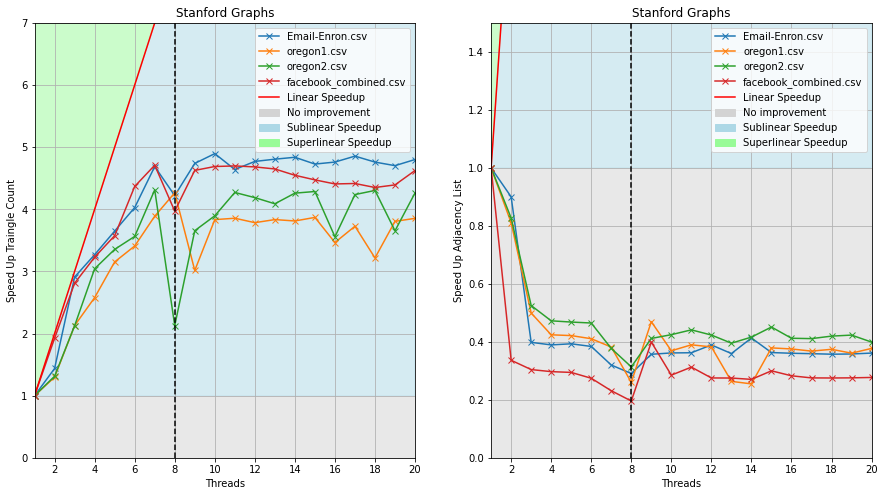

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

y_label = ''
y_lim = 0

for id_c, col in enumerate(axs):
        seq_plot = []
        
        if(id_c == 0): 
            y_label = 'speed_up_traingle_count'
            y_lim = 7
        else:
            y_label = 'speed_up_adjacency_list'
            y_lim = 1.5

        for val in sta_graph_vec:
            plot, = col.plot(threads, val[y_label], label=val['name'].unique()[0], marker='x')
            seq_plot.append(plot)
        threads = np.arange(1,21)
        plot, = col.plot(threads, threads, color='red', label='Linear Speedup')
        seq_plot.append(plot)

        col.fill_between(threads, 1, color='lightgrey', interpolate=True, alpha=0.5)
        col.fill_between(threads, 1, threads, color='lightblue', interpolate=True, alpha=0.5)
        col.fill_between(threads, threads, 20, color='palegreen', interpolate=True, alpha=0.5)
        col.axvline(x=8, color='black', ls='--')


        seq_plot.append(mpatches.Patch(color='lightgrey', label='No improvement'))
        seq_plot.append(mpatches.Patch(color='lightblue', label='Sublinear Speedup'))
        seq_plot.append(mpatches.Patch(color='palegreen', label='Superlinear Speedup'))


        col.set_xlabel('Threads')
        col.set_ylabel(y_label.replace('_', ' ').title())
        col.set_title('Stanford Graphs')

        col.legend(handles=seq_plot)

        col.set_xlim([1, 20])
        col.set_ylim([0, y_lim])

        col.grid()
        col.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()
